# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Matplotlib-Basics" data-toc-modified-id="Matplotlib-Basics-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Matplotlib Basics</a></div><div class="lev3 toc-item"><a href="#A-Simple-Sine/Cosine-plot" data-toc-modified-id="A-Simple-Sine/Cosine-plot-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>A Simple Sine/Cosine plot</a></div><div class="lev2 toc-item"><a href="#Exercise:-Plot-the-Normal-Distribution" data-toc-modified-id="Exercise:-Plot-the-Normal-Distribution-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Exercise: Plot the Normal Distribution</a></div><div class="lev2 toc-item"><a href="#Now-as-Boxplots" data-toc-modified-id="Now-as-Boxplots-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Now as Boxplots</a></div><div class="lev2 toc-item"><a href="#And-Histograms" data-toc-modified-id="And-Histograms-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>And Histograms</a></div>

In [1]:
# for matplotlib to work smoothly with Jupyter notebooks the following "Magic" is required:

%matplotlib inline

# Matplotlib Basics
based on http://www.labri.fr/perso/nrougier/teaching/matplotlib/

### A Simple Sine/Cosine plot

- Create a numpy array X with 256 values ranging from -Pi to +Pi 

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# scipy and seaborn are used for visualization of the normal distribution
from scipy import stats, integrate
import seaborn as sns

# X-axis array for visualization
X = np.linspace(-np.pi, np.pi, 256, endpoint=True)

- Create two arrays C,S with values for the sine/cosine of X

In [3]:
C = np.cos(X)
S = np.sin(X)

- Plot the curves using defaults

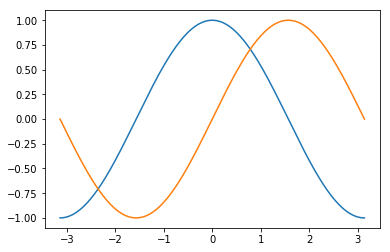

In [4]:
plt.plot(X,C)
plt.plot(X,S)

plt.show()

- Change colors and line widths

<function matplotlib.pyplot.show>

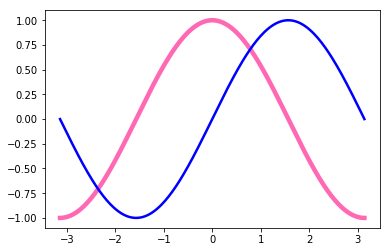

In [5]:
# same plot, but with different colors and linewidth
plt.plot(X,C, color="hotpink", linewidth="4.5")
plt.plot(X,S, color="blue", linewidth="2.5")
plt.show

## Exercise: Plot the Normal Distribution

#### Task 1: Reproduce the following image as closely as you can:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png'>

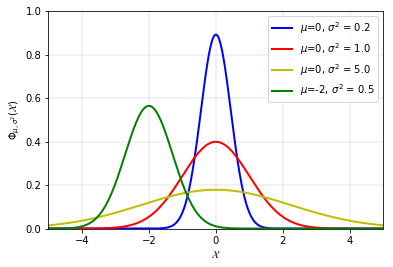

In [6]:
# function for gauss
def make_gauss(N, sig, mu):
    return lambda x: N/(sig * (2*np.pi)**.5) * np.e ** (-(x-mu)**2/(2 * sig**2))

# add axis instance
ax = plt.figure().add_subplot(1,1,1)

# set background grid
ax.grid(color='grey', linestyle='-', linewidth=0.2)

# set axis labels
ax.set_xlabel('$\mathcal{X}$')
ax.set_ylabel('$\Phi_{\mu,\sigma^2}(\mathcal{X})$')

# x-axis
x = np.arange(-5, 5, 0.01)

# sigma values
s = np.sqrt([0.2, 1, 5, 0.5])

# mu values
m = [0, 0, 0, -2] 

# colors
c = ['b','r','y','g']

# create plot
for sig, mu, color in zip(s, m, c): 
    gauss = make_gauss(1, sig, mu)(x)
    ax.plot(x, gauss, color, linewidth=2)

# set axis limits
plt.xlim(-5, 5)
plt.ylim(0, 1)

# create legend string
plt.legend(['$\mu$=0, $σ^2$ = 0.2', '$\mu$=0, $σ^2$ = 1.0', '$\mu$=0, $σ^2$ = 5.0', '$\mu$=-2, $σ^2$ = 0.5'], loc='upper right')

# show plot
plt.show()

#### Task 2: Now plot the above distributions as Boxplots

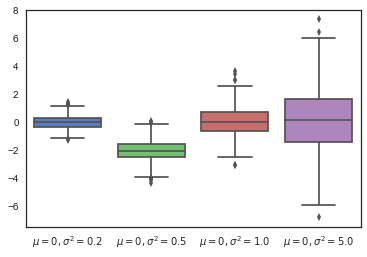

In [39]:
import pandas as pandas

# create dict of data
my_data = {'$\mu = 0, \sigma^2 = 0.2$': np.random.normal(0,np.sqrt(0.2),1000),'$\mu = 0, \sigma^2 = 1.0$': np.random.normal(0,np.sqrt(1),1000),'$\mu = 0, \sigma^2 = 5.0$': np.random.normal(0,np.sqrt(5),1000),'$\mu = 0, \sigma^2 = 0.5$': np.random.normal(-2,np.sqrt(0.5),1000)}

# create dataframe from data dict
df = pandas.DataFrame.from_dict(my_data)

# use seaborn to plot boxplots
sns.boxplot(data=df)

#### Task 3: ... and as histograms

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


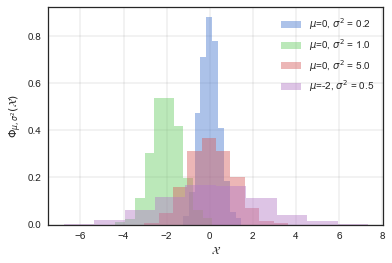

In [51]:
# add axis instance
ax = plt.figure().add_subplot(1,1,1)

# set background grid
ax.grid(color='grey', linestyle='-', linewidth=0.2)

# set axis labels
ax.set_xlabel('$\mathcal{X}$')
ax.set_ylabel('$\Phi_{\mu,\sigma^2}(\mathcal{X})$')

# x-axis
x = np.arange(-5, 5, 0.01)

for col in df:
    plt.hist(df[col], alpha=0.45, normed=True)
    
# create legend string
plt.legend(['$\mu$=0, $σ^2$ = 0.2', '$\mu$=0, $σ^2$ = 1.0', '$\mu$=0, $σ^2$ = 5.0', '$\mu$=-2, $σ^2$ = 0.5'])
